In [1]:
import pandas as pd
import numpy as np
aisles=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/rawdata/aisles.csv')
print(aisles)

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [2]:
departments=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/rawdata/departments.csv')

In [3]:
departments

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [4]:
aisles

aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]

In [5]:
orders=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/rawdata/orders.csv')
orders

order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         2539329        1             1          2                  8   
1         2398795        1             2          3                  7   
2          473747        1             3          3                 12   
3         2254736        1             4          4                  7   
4          431534        1             5          4                 15   
...           ...      ...           ...        ...                ...   
3421078   2266710   206209            10          5                 18   
3421079   1854736   206209            11          4                 10   
3421080    626363   206209            12          1                 12   
3421081   2977660   206209            13          1                 12   
3421082    272231   206209            14          6                 14   

         days_since_prior_order  
0                           NaN  
1                          15.0  
2                          21.0  
3                          29.0  
4                          28.0  
...                         ...  
3421078                    29.0  
3421079                    30.0  
3421080                    18.0  
3421081                     7.0  
3421082                    30.0  

[3421083 rows x 6 columns]

In [6]:
order_products=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/rawdata/order_products.csv')
order_products

order_id  product_id  add_to_cart_order
0                2       33120                  1
1                2       28985                  2
2                2        9327                  3
3                2       45918                  4
4                2       30035                  5
...            ...         ...                ...
33819101   3421063       14233                  3
33819102   3421063       35548                  4
33819103   3421070       35951                  1
33819104   3421070       16953                  2
33819105   3421070        4724                  3

[33819106 rows x 3 columns]

In [7]:
products=pd.read_csv('/Users/jinglinhui/Desktop/Data_analytics_project/rawdata/products.csv')
products

product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684            Vodka Triple Distilled Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3            38              1  
4             5             13  
...         ...            ...  
49683       124              5  
49684        42              1  
49685       112              3  
49686        41              8  
49687        73             11  

[49688 rows x 4 columns]

In [8]:
#adding order_products table into products table by matching product_id
merged_left = pd.merge(left=products, right=order_products, how='left', left_on='product_id', right_on='product_id')
merged_left

product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                  1  Chocolate Sandwich Cookies        61             19   
3                  1  Chocolate Sandwich Cookies        61             19   
4                  1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
33819104       49688      Fresh Foaming Cleanser        73             11   
33819105       49688      Fresh Foaming Cleanser        73             11   
33819106       49688      Fresh Foaming Cleanser        73             11   
33819107       49688      Fresh Foaming Cleanser        73             11   
33819108       49688      Fresh Foaming Cleanser        73             11   

           order_id  add_to_cart_order  
0            1107.0                7.0  
1            5319.0                3.0  
2            7540.0                4.0  
3            9228.0                2.0  
4            9273.0               30.0  
...             ...                ...  
33819104  3401313.0                5.0  
33819105   655800.0               10.0  
33819106  2198380.0               10.0  
33819107  2508423.0                3.0  
33819108  2986153.0               16.0  

[33819109 rows x 6 columns]

In [9]:
#adding department table to the new table by matching department_id
merged_left2 = pd.merge(left=merged_left, right=departments, how='left', left_on='department_id', right_on='department_id')

In [10]:
#adding aisles table to the new table by match aisle_id
merged_left3 = pd.merge(left=merged_left2, right=aisles, how='left', left_on='aisle_id', right_on='aisle_id')

In [11]:
#adding order table to the new table by matching order_id
joined_table = pd.merge(left=merged_left3, right=orders, how='left', left_on='order_id', right_on='order_id')
joined_table

product_id                product_name  aisle_id  department_id  \
0                  1  Chocolate Sandwich Cookies        61             19   
1                  1  Chocolate Sandwich Cookies        61             19   
2                  1  Chocolate Sandwich Cookies        61             19   
3                  1  Chocolate Sandwich Cookies        61             19   
4                  1  Chocolate Sandwich Cookies        61             19   
...              ...                         ...       ...            ...   
33819104       49688      Fresh Foaming Cleanser        73             11   
33819105       49688      Fresh Foaming Cleanser        73             11   
33819106       49688      Fresh Foaming Cleanser        73             11   
33819107       49688      Fresh Foaming Cleanser        73             11   
33819108       49688      Fresh Foaming Cleanser        73             11   

           order_id  add_to_cart_order     department          aisle  \
0            1107.0                7.0         snacks  cookies cakes   
1            5319.0                3.0         snacks  cookies cakes   
2            7540.0                4.0         snacks  cookies cakes   
3            9228.0                2.0         snacks  cookies cakes   
4            9273.0               30.0         snacks  cookies cakes   
...             ...                ...            ...            ...   
33819104  3401313.0                5.0  personal care    facial care   
33819105   655800.0               10.0  personal care    facial care   
33819106  2198380.0               10.0  personal care    facial care   
33819107  2508423.0                3.0  personal care    facial care   
33819108  2986153.0               16.0  personal care    facial care   

           user_id  order_number  order_dow  order_hour_of_day  \
0          38259.0           2.0        1.0               11.0   
1         196224.0          65.0        1.0               14.0   
2         138499.0           8.0        0.0               14.0   
3          79603.0           2.0        2.0               10.0   
4          50005.0           1.0        1.0               15.0   
...            ...           ...        ...                ...   
33819104  200377.0           1.0        4.0               11.0   
33819105  159099.0          10.0        4.0               14.0   
33819106   40460.0           7.0        3.0               14.0   
33819107  187233.0           7.0        6.0               21.0   
33819108   40384.0           7.0        2.0                9.0   

          days_since_prior_order  
0                            7.0  
1                            1.0  
2                            7.0  
3                           30.0  
4                            NaN  
...                          ...  
33819104                     NaN  
33819105                    23.0  
33819106                    30.0  
33819107                    13.0  
33819108                    13.0  

[33819109 rows x 13 columns]

In [12]:
most_ordered=joined_table['product_name'].value_counts()

In [13]:
most_ordered

Banana                                         491291
Bag of Organic Bananas                         394930
Organic Strawberries                           275577
Organic Baby Spinach                           251705
Organic Hass Avocado                           220877
                                                ...  
Flame Roasted Red Peppers Spreadable Cheese         1
Petite Black Eyed Peas                              1
Escapes Variety Pack                                1
Anjou Pear Hand Soap                                1
Cld/Flu Van Chrry                                   1
Name: product_name, Length: 49629, dtype: int64

In [14]:
#most_purchased_product=product_ordered.plot.bar()- could not run as the dataset was too big
test1=most_ordered[0:5]
test1

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Name: product_name, dtype: int64

In [15]:
Top_10_products=most_ordered[0:10]

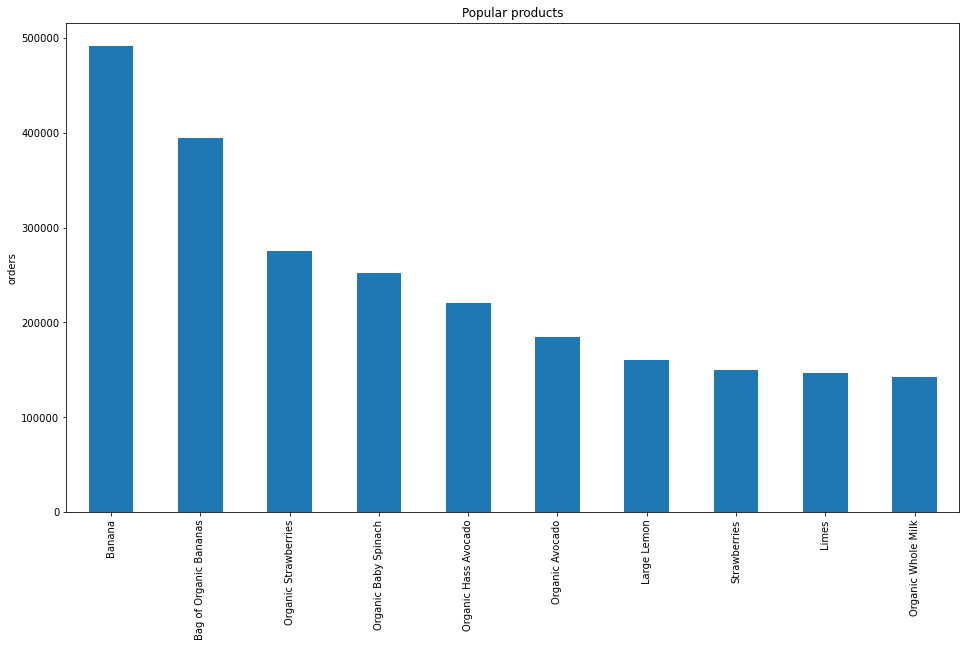

In [21]:
plt.figure(figsize=(16,9))
Top_10_products.plot.bar()
plt.ylabel('orders')
plt.title('Popular products')
plt.show()

<AxesSubplot:>

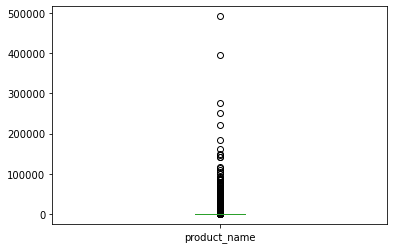

In [22]:
most_ordered.plot.box()

In [23]:
joined_table.head()

product_id                product_name  aisle_id  department_id  order_id  \
0           1  Chocolate Sandwich Cookies        61             19    1107.0   
1           1  Chocolate Sandwich Cookies        61             19    5319.0   
2           1  Chocolate Sandwich Cookies        61             19    7540.0   
3           1  Chocolate Sandwich Cookies        61             19    9228.0   
4           1  Chocolate Sandwich Cookies        61             19    9273.0   

   add_to_cart_order department          aisle   user_id  order_number  \
0                7.0     snacks  cookies cakes   38259.0           2.0   
1                3.0     snacks  cookies cakes  196224.0          65.0   
2                4.0     snacks  cookies cakes  138499.0           8.0   
3                2.0     snacks  cookies cakes   79603.0           2.0   
4               30.0     snacks  cookies cakes   50005.0           1.0   

   order_dow  order_hour_of_day  days_since_prior_order  
0        1.0               11.0                     7.0  
1        1.0               14.0                     1.0  
2        0.0               14.0                     7.0  
3        2.0               10.0                    30.0  
4        1.0               15.0                     NaN

In [24]:
avg_order_number=joined_table.groupby(['order_id'],sort=False)['add_to_cart_order'].max()

print(avg_order_number)

order_id
1107.0       17.0
5319.0        7.0
7540.0        7.0
9228.0        4.0
9273.0       33.0
             ... 
2910889.0     1.0
3015609.0     1.0
3032765.0     1.0
1150396.0     1.0
1288677.0     1.0
Name: add_to_cart_order, Length: 3346083, dtype: float64


In [25]:
print("average number of products ordered:")
avg_order_number.mean()


average number of products ordered:


10.10707325550502

In [18]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import folium
from folium import plugins

In [26]:
# fill the NA value in days_since_prior_order column as N
joined_table['days_since_prior_order'] = joined_table['days_since_prior_order'].fillna(value='N')

In [27]:
joined_table['days_since_prior_order'].unique()

array([7.0, 1.0, 30.0, 'N', 8.0, 14.0, 24.0, 6.0, 9.0, 5.0, 20.0, 0.0,
       15.0, 25.0, 16.0, 23.0, 26.0, 10.0, 28.0, 17.0, 22.0, 19.0, 3.0,
       2.0, 18.0, 11.0, 12.0, 13.0, 4.0, 21.0, 27.0, 29.0], dtype=object)

In [54]:
Sample=joined_table.sample(frac=0.1,random_state=1)

In [29]:
joined_table.describe()

product_id      aisle_id  department_id      order_id  \
count  3.381911e+07  3.381911e+07   3.381911e+07  3.381911e+07   
mean   2.557551e+04  7.121798e+01   9.918544e+00  1.710566e+06   
std    1.409770e+04  3.819898e+01   6.281655e+00  9.874008e+05   
min    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
25%    1.351900e+04  3.100000e+01   4.000000e+00  8.554130e+05   
50%    2.525600e+04  8.300000e+01   9.000000e+00  1.710660e+06   
75%    3.793500e+04  1.070000e+02   1.600000e+01  2.565587e+06   
max    4.968800e+04  1.340000e+02   2.100000e+01  3.421083e+06   

       add_to_cart_order       user_id  order_number     order_dow  \
count       3.381911e+07  3.381911e+07  3.381911e+07  3.381911e+07   
mean        8.367738e+00  1.029444e+05  1.713998e+01  2.737285e+00   
std         7.139540e+00  5.946733e+04  1.749829e+01  2.093296e+00   
min         1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%         3.000000e+00  5.143500e+04  5.000000e+00  1.000000e+00   
50%         6.000000e+00  1.026260e+05  1.100000e+01  3.000000e+00   
75%         1.100000e+01  1.544120e+05  2.400000e+01  5.000000e+00   
max         1.450000e+02  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  
count       3.381911e+07  
mean        1.343123e+01  
std         4.246149e+00  
min         0.000000e+00  
25%         1.000000e+01  
50%         1.300000e+01  
75%         1.600000e+01  
max         2.300000e+01

In [55]:
pandas_profiling.ProfileReport(Sample)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

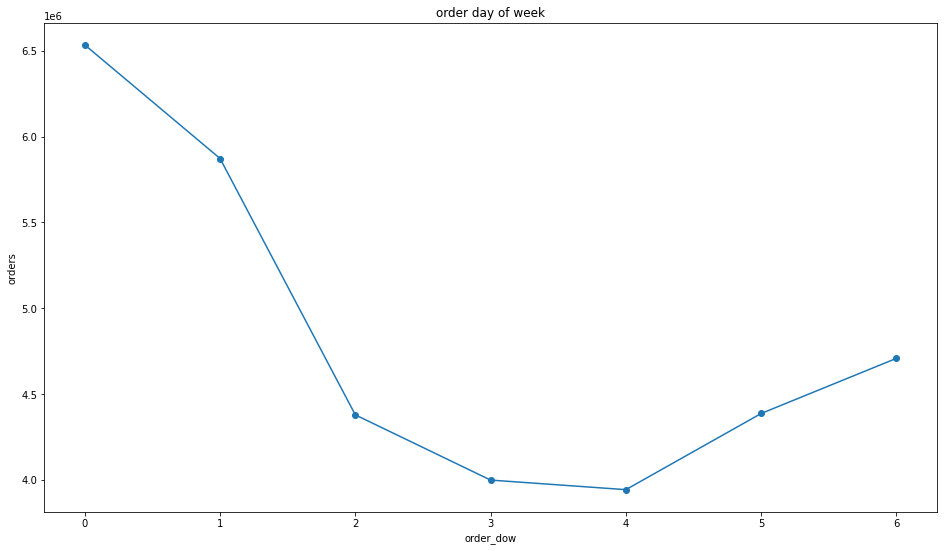

In [30]:
plt.figure(figsize=(16,9))
joined_table.groupby('order_dow')['order_id'].count().plot(marker = 'o')
plt.ylabel('orders')
plt.title('order day of week')
plt.show()

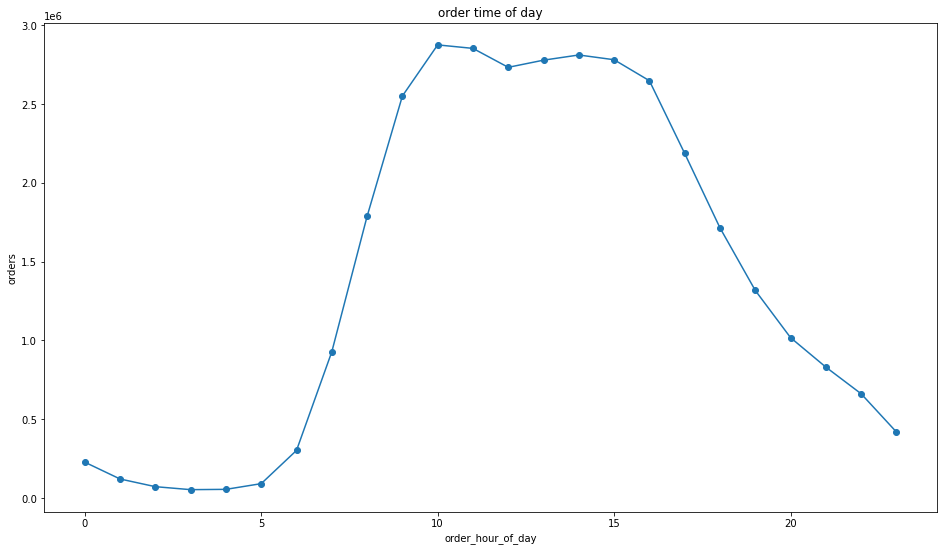

In [31]:
plt.figure(figsize=(16,9))
joined_table.groupby('order_hour_of_day')['order_id'].count().plot(marker = 'o')
plt.ylabel('orders')
plt.title('order time of day')
plt.show()

In [33]:
add_first=[f for f,i in zip(joined_table.product_name,joined_table.add_to_cart_order)if i==1.0]

In [34]:
from collections import Counter
add_count=Counter(add_first)

In [35]:
add_count.most_common(10)

[('Banana', 115521),
 ('Bag of Organic Bananas', 82877),
 ('Organic Whole Milk', 32071),
 ('Organic Strawberries', 28875),
 ('Organic Hass Avocado', 24913),
 ('Organic Baby Spinach', 24412),
 ('Organic Avocado', 23393),
 ('Spring Water', 17552),
 ('Strawberries', 17073),
 ('Organic Raspberries', 14950)]

In [36]:
x,y=map(list,zip(*add_count.most_common(10)))

In [48]:
test = pd.DataFrame(add_count.most_common(10))

<Figure size 1152x648 with 0 Axes>

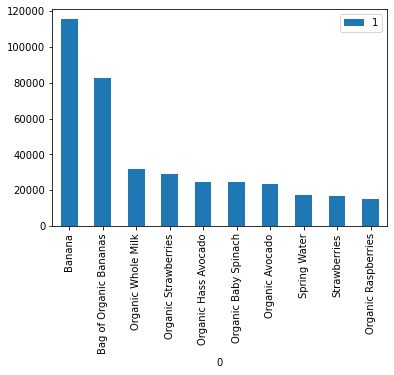

In [52]:
plt.figure(figsize=(16,9))
#test.set_index(0,drop=True,inplace=True)
test.plot.bar()
plt.show()

In [45]:
print (test)

                        0       1
0                  Banana  115521
1  Bag of Organic Bananas   82877
2      Organic Whole Milk   32071
3    Organic Strawberries   28875
4    Organic Hass Avocado   24913
5    Organic Baby Spinach   24412
6         Organic Avocado   23393
7            Spring Water   17552
8            Strawberries   17073
9     Organic Raspberries   14950


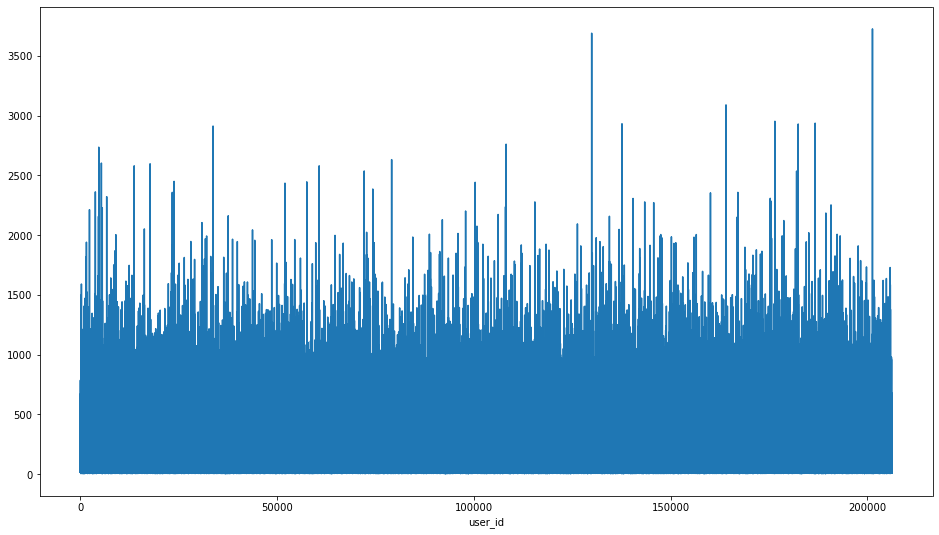

In [67]:
plt.figure(figsize=(16,9))
user_distr=joined_table.groupby('user_id')['order_number'].count().plot()
#plt.ylabel('num of orders')
#plt.title('customer')
#plt.show()
#print(type(user_distr))

In [70]:
Fav_aisle=joined_table['aisle'].value_counts()
Top_aisle=Fav_aisle[0:5]

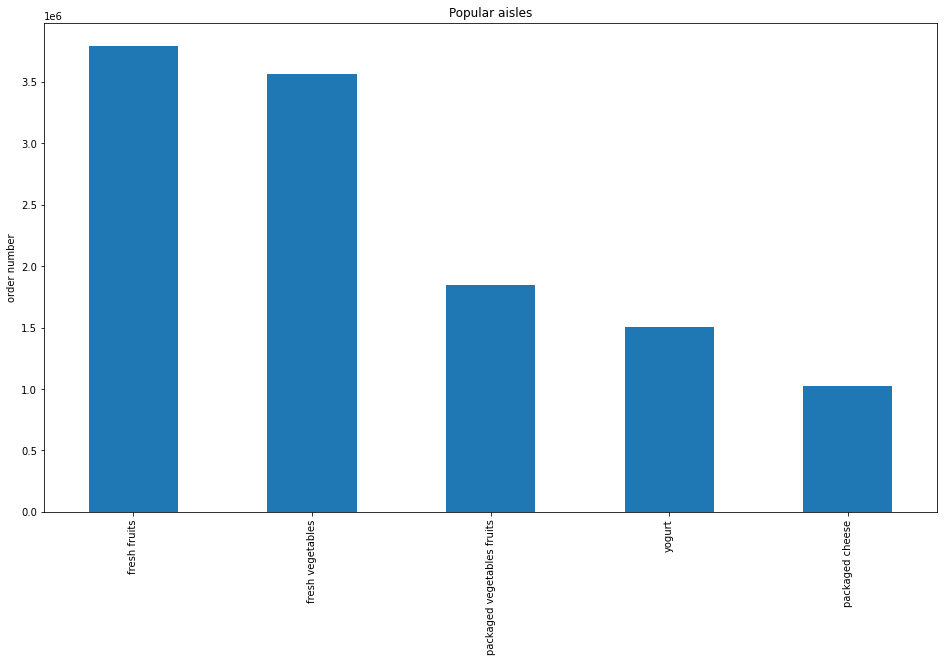

In [71]:
plt.figure(figsize=(16,9))
Top_aisle.plot.bar()
plt.ylabel('order number')
plt.title('Popular aisles')
plt.show()

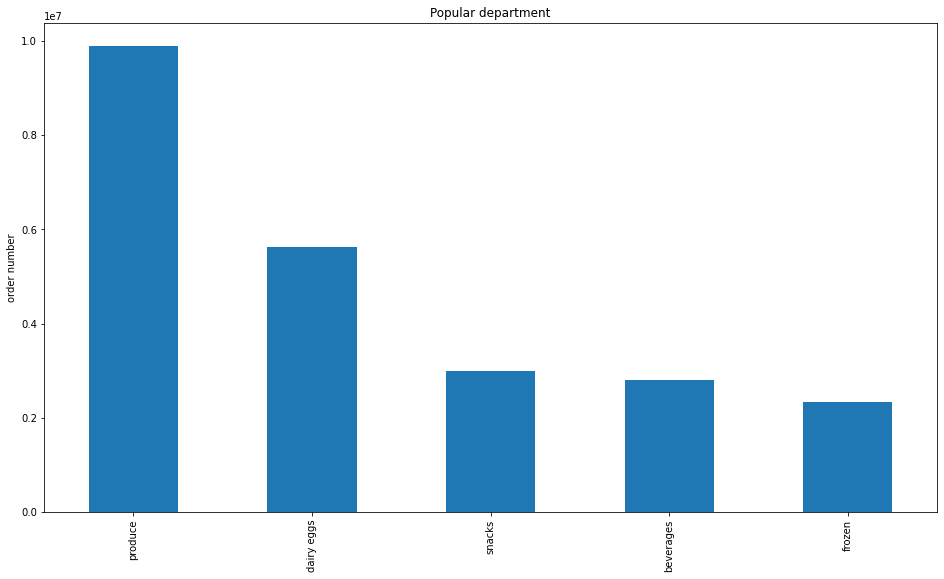

In [72]:
Fav_dep=joined_table['department'].value_counts()
Top_dep=Fav_dep[0:5]
plt.figure(figsize=(16,9))
Top_dep.plot.bar()
plt.ylabel('order number')
plt.title('Popular department')
plt.show()

<Figure size 2160x1008 with 0 Axes>

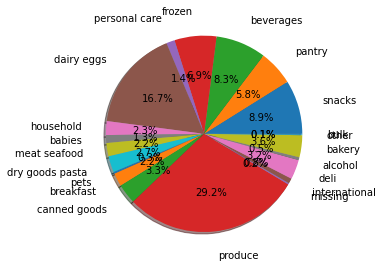

In [182]:
# use pie chart 
plt.figure(figsize=(30,14))
deps = joined_table['department'].unique().tolist()
#data = Counter(joined_table.department)
data1=pd.DataFrame.from_dict(data,orient='index')
count=joined_table.groupby('department')['order_id'].count()
fig1, ax1 = plt.subplots()
ax1.pie(data1[0], labels=data1.index,  autopct='%1.1f%%',shadow=True,labeldistance=1.25) 
ax1.axis('equal')
plt.show()

In [191]:
print(count['produce'])
testing=pd.DataFrame(count)
print(testing)
print(testing.loc['alcohol'].values)

9888378
                 order_id
department               
alcohol            159294
babies             438743
bakery            1225181
beverages         2804175
breakfast          739069
bulk                35932
canned goods      1114857
dairy eggs        5631067
deli              1095540
dry goods pasta    905340
frozen            2336858
household          774652
international      281155
meat seafood       739238
missing             77396
other               38086
pantry            1956819
personal care      468693
pets               102221
produce           9888378
snacks            3006412
[159294]


In [212]:
Best_sell=joined_table.groupby(['aisle','department'])['order_id'].count()

In [213]:
print(Best_sell)

aisle                          department     
air fresheners candles         household            20918
asian foods                    international       173614
baby accessories               babies                8466
baby bath body care            babies                8909
baby food formula              babies              395654
bakery desserts                bakery               36372
baking ingredients             pantry              339780
baking supplies decor          pantry               24786
beauty                         personal care         6455
beers coolers                  alcohol              50496
body lotions soap              personal care        42905
bread                          bakery              608469
breakfast bakery               bakery              260621
breakfast bars pastries        breakfast            75004
bulk dried fruits vegetables   bulk                 18093
bulk grains rice dried goods   bulk                 17839
buns rolls               

In [214]:
pd.set_option('display.max_rows', None)

In [215]:
Best_sell1=joined_table.groupby(['department','aisle'])['order_id'].count()

In [216]:
print(Best_sell1)

department       aisle                        
alcohol          beers coolers                      50496
                 red wines                          36424
                 specialty wines champagnes         11659
                 spirits                            29069
                 white wines                        31646
babies           baby accessories                    8466
                 baby bath body care                 8909
                 baby food formula                 395654
                 diapers wipes                      25714
bakery           bakery desserts                    36372
                 bread                             608469
                 breakfast bakery                  260621
                 buns rolls                        118069
                 tortillas flat bread              201650
beverages        cocoa drink mixes                  22276
                 coffee                            215467
                 energy s

In [217]:
Best_sell1.household.idxmax()

'paper goods'

In [249]:
print(Best_sell1)

department       aisle                        
alcohol          beers coolers                      50496
                 red wines                          36424
                 specialty wines champagnes         11659
                 spirits                            29069
                 white wines                        31646
babies           baby accessories                    8466
                 baby bath body care                 8909
                 baby food formula                 395654
                 diapers wipes                      25714
bakery           bakery desserts                    36372
                 bread                             608469
                 breakfast bakery                  260621
                 buns rolls                        118069
                 tortillas flat bread              201650
beverages        cocoa drink mixes                  22276
                 coffee                            215467
                 energy s

In [274]:
for i in departments.department.values:
    f=Best_sell1[i].idxmax()
    print(i,f)

frozen frozen produce
other other
bakery bread
produce fresh fruits
alcohol beers coolers
international asian foods
beverages water seltzer sparkling water
pets cat food care
dry goods pasta dry pasta
bulk bulk dried fruits vegetables
personal care soap
meat seafood hot dogs bacon sausage
pantry baking ingredients
breakfast cereal
canned goods soup broth bouillon
dairy eggs yogurt
household paper goods
babies baby food formula
snacks chips pretzels
deli lunch meat
missing missing


In [279]:
new_order = orders[['order_dow', 'order_hour_of_day']].copy()
new_order.head()

order_dow  order_hour_of_day
0          2                  8
1          3                  7
2          3                 12
3          4                  7
4          4                 15

In [300]:
new_dow=joined_table.groupby(['order_dow','order_hour_of_day'])['order_id'].count()
new_dow.head()

order_dow  order_hour_of_day
0.0        0.0                  40444
           1.0                  23647
           2.0                  13566
           3.0                   9375
           4.0                   8739
Name: order_id, dtype: int64

In [305]:
test=pd.DataFrame(new_dow)
test.head()

order_dow  order_hour_of_day  order_id
0        0.0                0.0     40444
1        0.0                1.0     23647
2        0.0                2.0     13566
3        0.0                3.0      9375
4        0.0                4.0      8739

In [306]:
df_new = test.rename(columns={'order_id': 'order_count'})

In [309]:
df_new.head()

order_dow  order_hour_of_day  order_count
0        0.0                0.0        40444
1        0.0                1.0        23647
2        0.0                2.0        13566
3        0.0                3.0         9375
4        0.0                4.0         8739

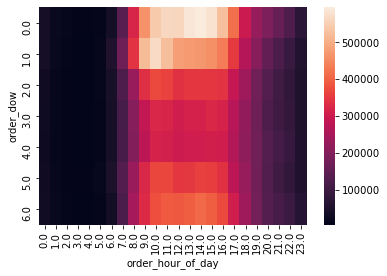

In [310]:
new = df_new.pivot("order_dow", "order_hour_of_day", "order_count")
ax = sns.heatmap(new)